# Problem Statement
Churn is a one of the biggest problem in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
## Data information

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

### The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device   protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

First, Import the data stored in SQL Database.
- make a odbc connection
- read as a pandas Dataframe

In [1]:
import pandas as pd
import pyodbc 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-FV1I7CQ;'
                      "uid=SanketDatabase;pwd=patil")

cursor = conn.cursor()

df = pd.read_sql_query('Select * from [Telco Churn ].dbo.[Telco-Customer-Churn]',conn)

Let's Look at the dataframe

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Initial plan for data exploration
- Overview the data
- check datatypes of the features
- check null values and take action
- Feature Engineering (One-hot-encoding, skewness check)
- Data Exploration (Visual Analysis)

In [3]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns # For creating plots

In [4]:
print(df.shape)
print(df.columns.tolist())

(7043, 21)
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


- We have 7043 customer data and 21 columns including target variable Churn
- Now we should look at datatype for each column

In [5]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure               object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


- change the data type of tenure and seniorCitizen column
- check null values 

In [6]:
df.tenure = pd.to_numeric(df.tenure, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Feature engineering

- Drop missing values
- Customer ID is not going to help ML model; we must drop that coulmn
- replace the churn values i.e Yes, No to 1,0

In [7]:
df.dropna(inplace = True)
df2 = df.iloc[:,1:]

df2['Churn'] = df2['Churn'].replace(['Yes', 'No'], [1, 0])
df2['SeniorCitizen'] = df2['SeniorCitizen'].replace(['1','0'], ['Yes', 'No'])
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [8]:
df2.describe(include='object').T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,No,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


- Identify which variables are binary, categorical and not ordinal, categorical and ordinal, and numeric. The non-numeric features will need to be encoded.

In [9]:
df_uniques = pd.DataFrame([[i, len(df2[i].unique())] for i in df2.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,72
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


- Create a list of binary freatures

In [10]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

- Create a list of categorical freatures

In [11]:
categorical_variables = list(df_uniques[(4 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

- check the unique levels in categorical features

In [12]:
[[i, list(df[i].unique())] for i in categorical_variables]

[['MultipleLines', ['No phone service', 'No', 'Yes']],
 ['InternetService', ['DSL', 'Fiber optic', 'No']],
 ['OnlineSecurity', ['No', 'Yes', 'No internet service']],
 ['OnlineBackup', ['Yes', 'No', 'No internet service']],
 ['DeviceProtection', ['No', 'Yes', 'No internet service']],
 ['TechSupport', ['No', 'Yes', 'No internet service']],
 ['StreamingTV', ['No', 'Yes', 'No internet service']],
 ['StreamingMovies', ['No', 'Yes', 'No internet service']],
 ['Contract', ['Month-to-month', 'One year', 'Two year']],
 ['PaymentMethod',
  ['Electronic check',
   'Mailed check',
   'Bank transfer (automatic)',
   'Credit card (automatic)']]]

- create a list of ordinal catagorical features

In [13]:
ordinal_variables = ['Contract']

- Create a list of Numeric freatures

In [14]:
numeric_variables = list(set(df2.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))
print(numeric_variables)

['MonthlyCharges', 'TotalCharges', 'tenure']


- check the skewness of the Numerical features

array([[<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>],
       [<AxesSubplot:title={'center':'tenure'}>, <AxesSubplot:>]],
      dtype=object)

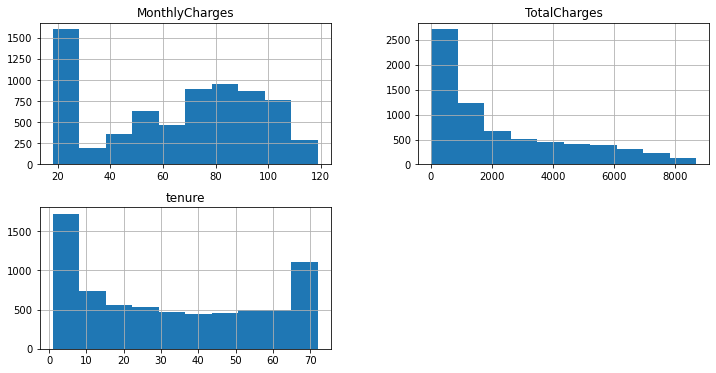

In [15]:
df2[numeric_variables].hist(figsize=(12, 6))

In [16]:
from scipy.stats import skew 
for i in numeric_variables:
    print(i + " =", skew(df2[i])) # log1p,sqrt,cbrt

MonthlyCharges = -0.22205554798978874
TotalCharges = 0.9614373590490068
tenure = 0.23768011839839964


<AxesSubplot:>

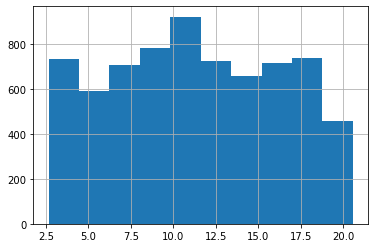

In [17]:
np.cbrt(df2['TotalCharges']).hist()

In [18]:
df2['TotalCharges']= np.cbrt(df2['TotalCharges'])

- convert ordinal features in numeric levels respectively

In [19]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
lb, le = LabelBinarizer(), LabelEncoder()

In [20]:
for column in ordinal_variables:
    df2[column] = le.fit_transform(df2[column])

df2[ordinal_variables].astype('category').describe()

,Contract
count,7032
unique,3
top,0
freq,3875


In [21]:
for column in binary_variables:
    df2[column] = lb.fit_transform(df2[column])

df2[binary_variables].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,0.903299,0.592719,0.265785
std,0.500014,0.368844,0.499729,0.457629,0.295571,0.491363,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
categorical_variables = list(set(categorical_variables) - set(ordinal_variables))

In [23]:
df = pd.get_dummies(df2, columns = categorical_variables, drop_first=True)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.504693,0.500014,0.000000,0.000000,1.00000,1.000000,1.000000
SeniorCitizen,7032.0,0.162400,0.368844,0.000000,0.000000,0.00000,0.000000,1.000000
Partner,7032.0,0.482509,0.499729,0.000000,0.000000,0.00000,1.000000,1.000000
Dependents,7032.0,0.298493,0.457629,0.000000,0.000000,0.00000,1.000000,1.000000
tenure,7032.0,32.421786,24.545260,1.000000,9.000000,29.00000,55.000000,72.000000
PhoneService,7032.0,0.903299,0.295571,0.000000,1.000000,1.00000,1.000000,1.000000
Contract,7032.0,0.688567,0.832934,0.000000,0.000000,0.00000,1.000000,2.000000
PaperlessBilling,7032.0,0.592719,0.491363,0.000000,0.000000,1.00000,1.000000,1.000000
MonthlyCharges,7032.0,64.798208,30.085974,18.250000,35.587500,70.35000,89.862500,118.750000
TotalCharges,7032.0,11.355248,4.899482,2.659006,7.376955,11.18016,15.597701,20.555116


In [25]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

for column in [ordinal_variables + numeric_variables]:
    df[column] = mm.fit_transform(df[column])
    
round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
gender,7032.0,0.505,0.500,0.0,0.000,1.000,1.000,1.0
SeniorCitizen,7032.0,0.162,0.369,0.0,0.000,0.000,0.000,1.0
Partner,7032.0,0.483,0.500,0.0,0.000,0.000,1.000,1.0
Dependents,7032.0,0.298,0.458,0.0,0.000,0.000,1.000,1.0
tenure,7032.0,0.443,0.346,0.0,0.113,0.394,0.761,1.0
PhoneService,7032.0,0.903,0.296,0.0,1.000,1.000,1.000,1.0
Contract,7032.0,0.344,0.416,0.0,0.000,0.000,0.500,1.0
PaperlessBilling,7032.0,0.593,0.491,0.0,0.000,1.000,1.000,1.0
MonthlyCharges,7032.0,0.463,0.299,0.0,0.173,0.518,0.713,1.0
TotalCharges,7032.0,0.486,0.274,0.0,0.264,0.476,0.723,1.0


## Visual Analysis
1. see gender distribution in the dataset
  
  It is equal in distribution

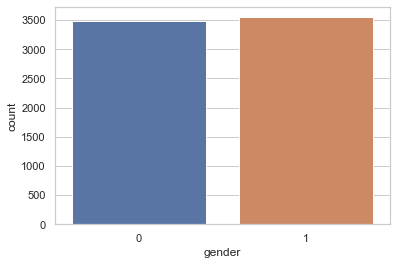

In [26]:
sns.set(style="whitegrid")
ax = sns.countplot( df['gender'])

2. see SeniorCitizen distribution in the dataset
   
   About 16% customer are Senior Citizen


Text(0.5, 1.0, '% of Senior Citizens')

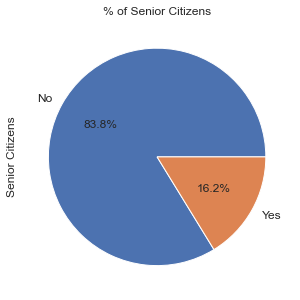

In [27]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )  
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

- Plot dependent and non dependent customers to gender

([<matplotlib.axis.XTick at 0x1606519e190>,
 [Text(0, 0, 'Not a Dependents'), Text(1, 0, 'Dependents')])

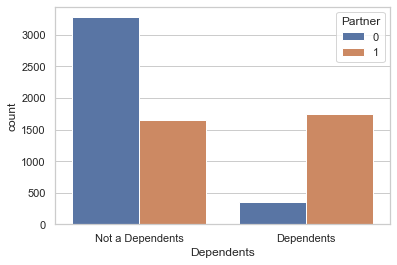

In [28]:
sns.set(style="whitegrid")
ax = sns.countplot( df['Dependents'], hue= df.Partner)
plt.xticks([0,1], ['Not a Dependents', 'Dependents'])

- plot contract type counts

Text(0.5, 1.0, '# of Customers by Contract Type')

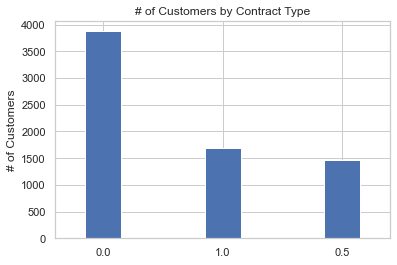

In [29]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

- How many custmer in this dataset churned ?
   
   26.578498 percent customer in this dataset churned;
   this is unbalanced dataset

0    73.421502
1    26.578498
Name: Churn, dtype: float64

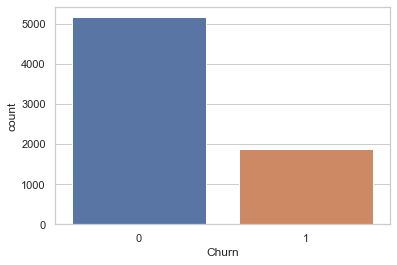

In [30]:
sns.set(style="whitegrid")
ax = sns.countplot( df['Churn'])
((df['Churn']).value_counts() / len(df))*100

- see the correlation of churn with other variable

<AxesSubplot:>

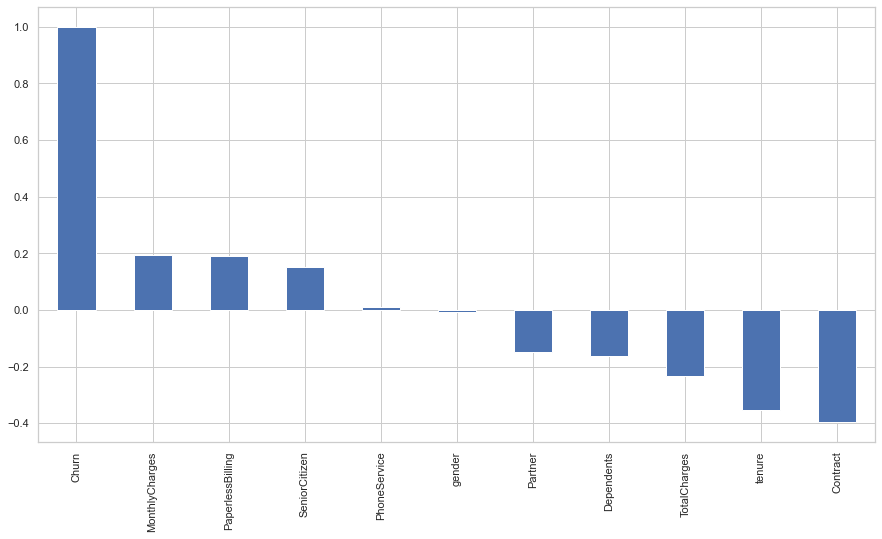

In [31]:
plt.figure(figsize=(15,8))
df2.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Dealing with imbalanced data

In [32]:
from sklearn.model_selection import train_test_split
y, X = df['Churn'], df.drop(columns='Churn')

In [33]:
#from imblearn.under_sampling import RandomUnderSampler
#undersample = RandomUnderSampler(sampling_strategy='majority')
#X_under, y_under = undersample.fit_resample(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42,stratify=y_under)

- Under smapling using TomekLinks

In [34]:
#from imblearn.under_sampling import TomekLinks
#undersample = TomekLinks(sampling_strategy='majority')
#X_under, y_under = undersample.fit_resample(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=42,stratify=y_under)

- Over sampling using SMOTE

In [35]:
#from imblearn.over_sampling import SMOTE
#oversample = SMOTE(sampling_strategy='minority')
#X_over, y_over = oversample.fit_resample(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3, random_state=42,stratify=y_over)

- Over-sampling SMOTE followed by under-sampling Tomek

In [36]:
from imblearn.combine import SMOTETomek
bothsample = SMOTETomek(sampling_strategy='auto')
X_both, y_both = bothsample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_both, y_both, test_size=0.30, random_state=42,stratify=y_both)

# Machine Learning Implementation
1. Hyperparameter tuning
2. ML algorithm fitting, prediction
3. Result assessment - confusition Matrix, ROC & Precesion/recall curves

## 1. KNN ML Model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

- Split training and testing data

- Find and plot the k - F1 result for KNN ML model

In [38]:
max_k = 66
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1800x1200 with 0 Axes>

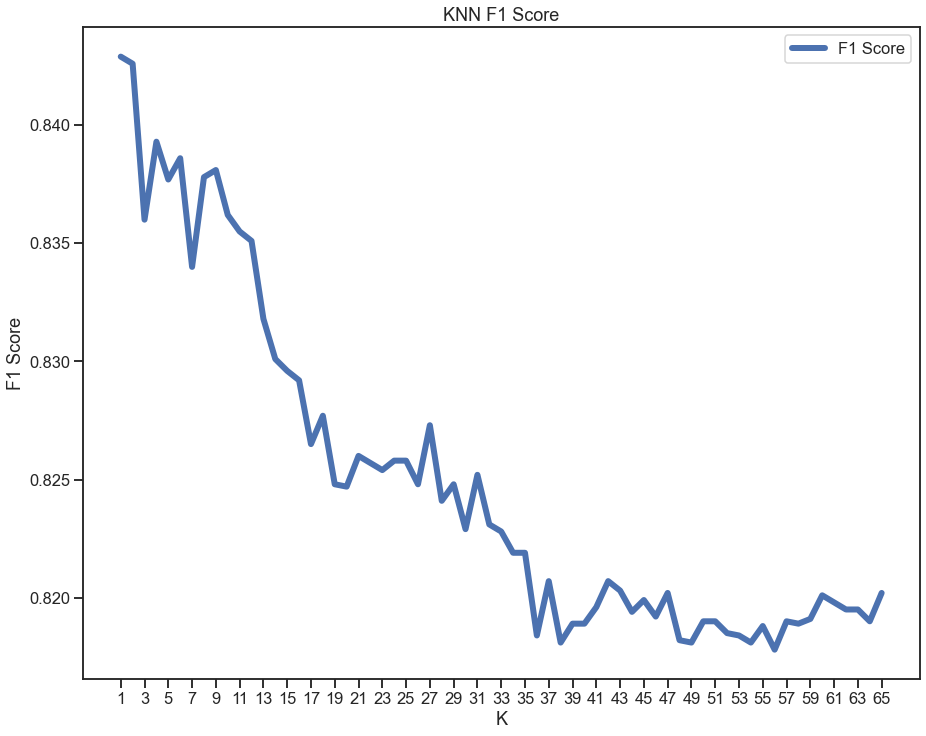

In [39]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot( figsize=(15, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

- plot k-error rate

<Figure size 1800x1200 with 0 Axes>

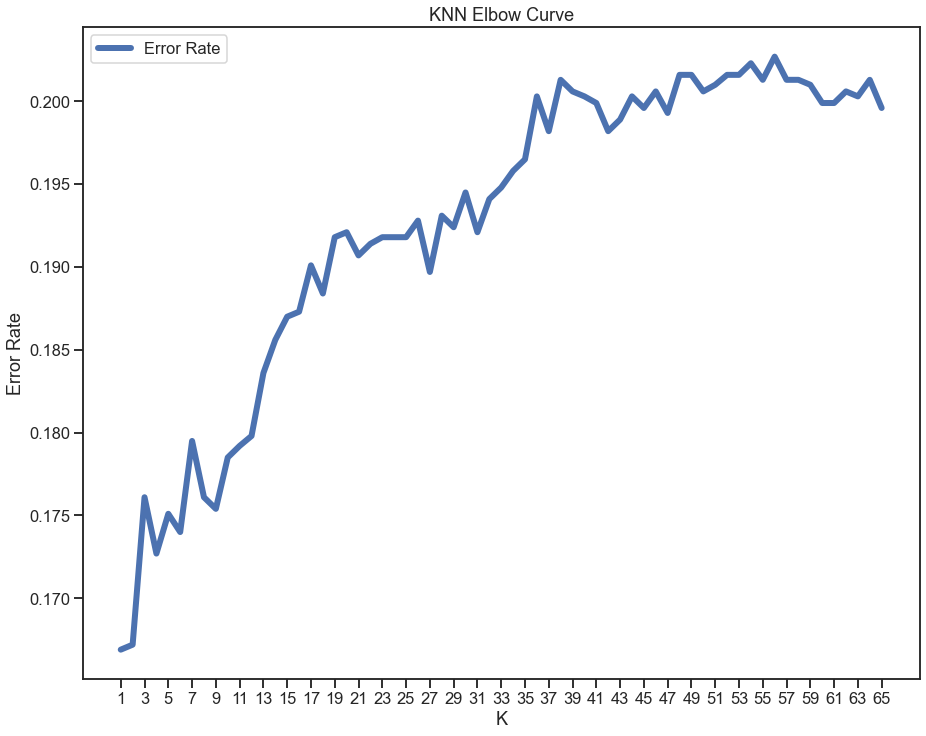

In [40]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot( figsize=(15, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png')

- train KNN model, estimate and report outcomes

In [57]:
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1468
           1       0.80      0.90      0.84      1468

    accuracy                           0.83      2936
   macro avg       0.84      0.83      0.83      2936
weighted avg       0.84      0.83      0.83      2936

Accuracy score:  0.83
F1 Score:  0.84


- plot confusion matrix

Text(0.5, 76.5, 'Ground Truth')

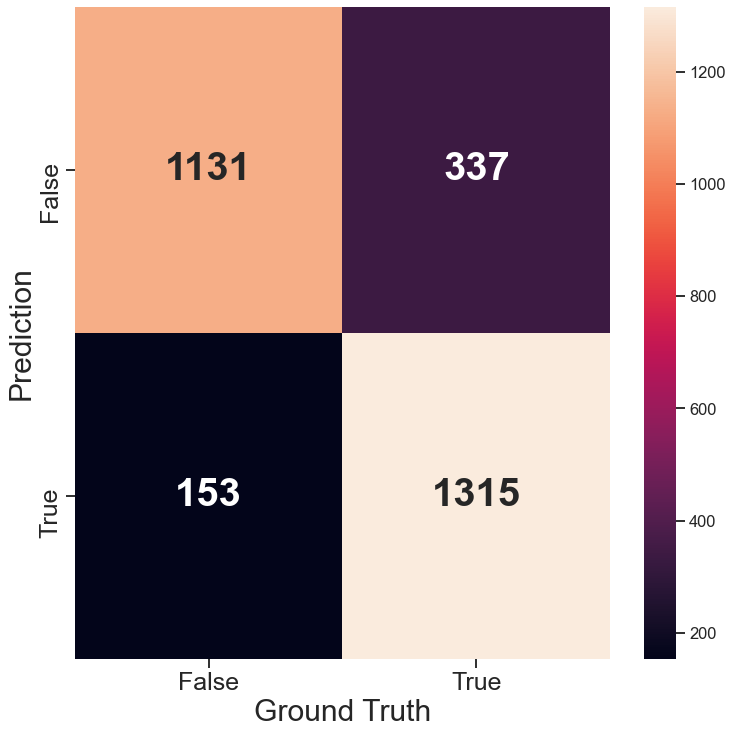

In [58]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

- Plot ROC and Precision-Recall curve

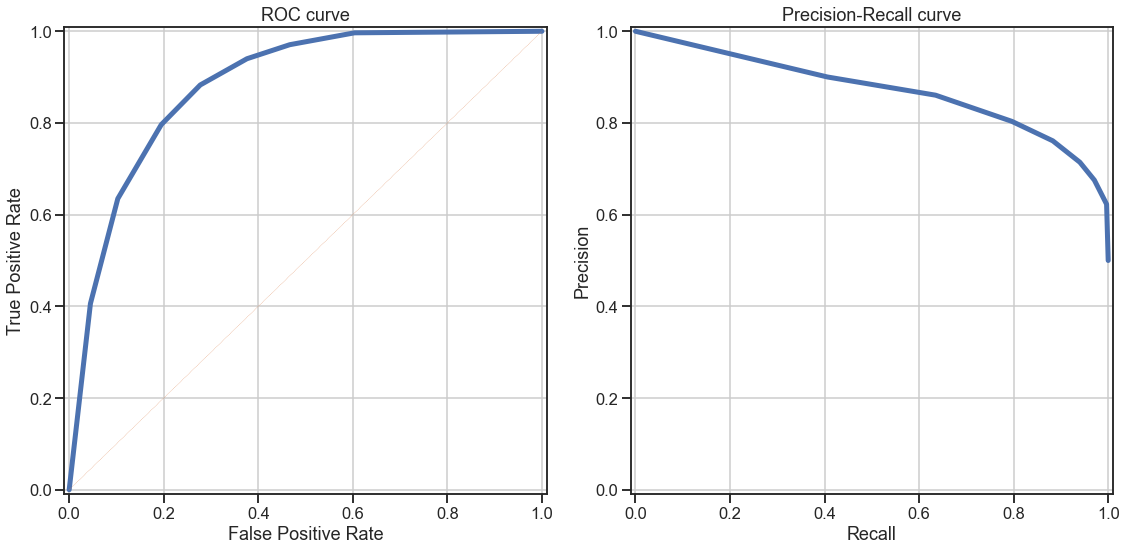

In [43]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = knn.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

## 2. Logistic regression ML Model

- train logistic regression ML model

In [44]:
from sklearn.linear_model import LogisticRegressionCV

lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred = lr_l1.predict(X_test)
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1468
           1       0.82      0.82      0.82      1468

    accuracy                           0.82      2936
   macro avg       0.82      0.82      0.82      2936
weighted avg       0.82      0.82      0.82      2936

Accuracy score:  0.82
F1 Score:  0.82


- plot confusion matrix

Text(0.5, 76.5, 'Ground Truth')

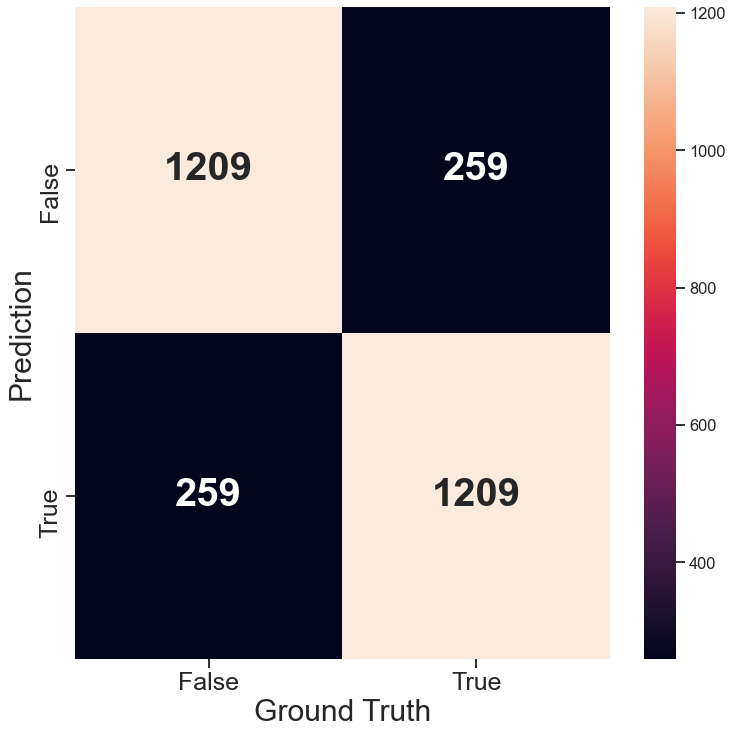

In [45]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

- Plot ROC and Precision-Recall curve

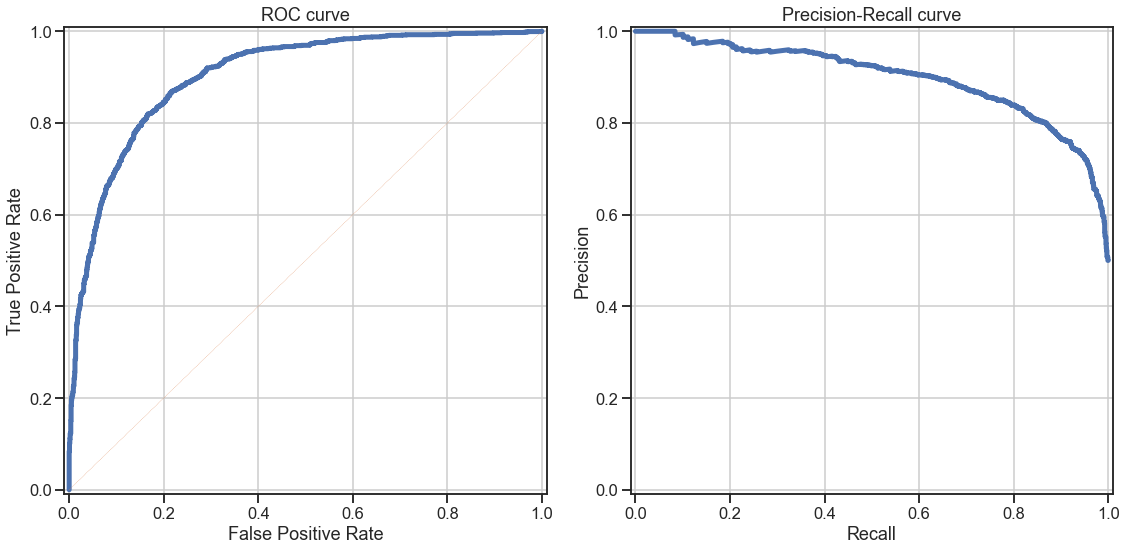

In [46]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = lr_l1.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

### 3. Random Forest ML model 

- train random forest model with hyperparameter, estimate and report outcomes

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1468
           1       0.85      0.88      0.86      1468

    accuracy                           0.86      2936
   macro avg       0.86      0.86      0.86      2936
weighted avg       0.86      0.86      0.86      2936

Accuracy score:  0.86
F1 Score:  0.86


Text(0.5, 76.5, 'Ground Truth')

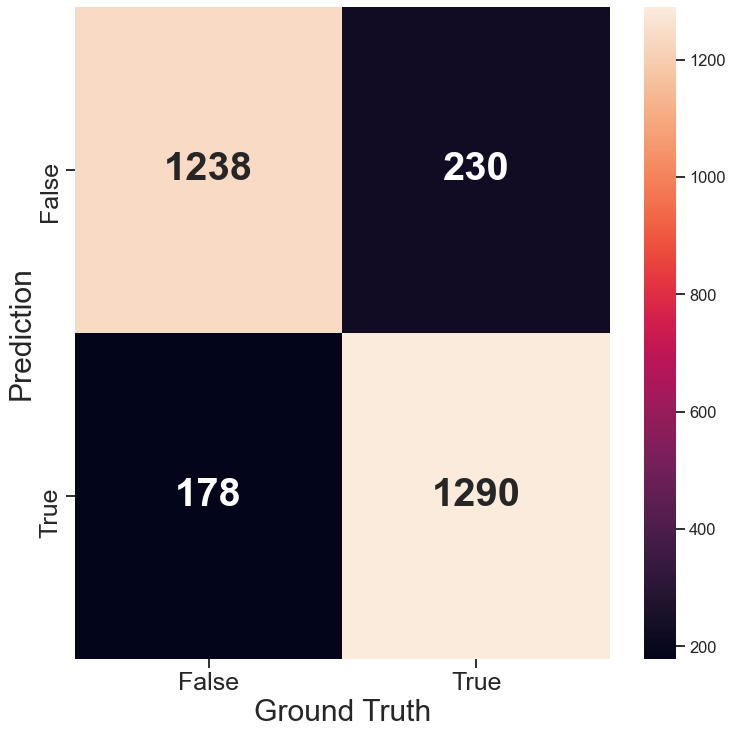

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators = 600, random_state=42,warm_start= True, n_jobs= -1, max_features = "sqrt", max_depth= 140 ).fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))


from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels, fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

In [49]:
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
max_features = ["auto", "sqrt","log1"]
# create random grid
random_grid = {
 'n_estimators': n_estimators, #   max_features = [‘auto’, ‘sqrt’,"log1"] /n
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.4min finished


{'n_estimators': 600, 'max_features': 'sqrt', 'max_depth': 140}


- Model positive recall is 88 percent which is important in this problem.

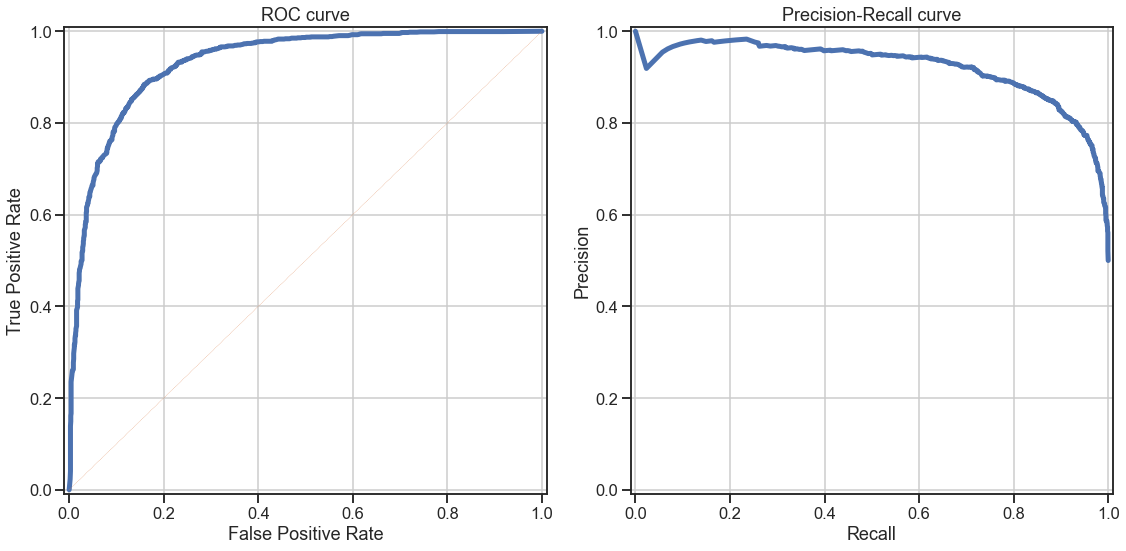

In [51]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = rf.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision, linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

## Summary Key Findings

so far, Random Forest model performed well.

- KNN and Randomforest model predicted similar results
- RandomForest model preformed good in positive class prediction which is the main focus for this problem with very high recall score (specificity)
- our model has a 88% recall. In such problems, a good recall value is expected.
- Precision and Recall follows a trade-off, and you need to find a point where your recall, as well as your precision, is more than good but both can't increase simultaneously.
#### overall  86%  is a very good result

## Suggestions for next steps
 
- some feature could be more importanat and ignoring some will make better model
- For this backward feature selection would give better result.